# Task 4.10
# Part 1

In [2]:
#importing libraries
import pandas as pd
import numpy as np
import os
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

# 1. Import the data set you exported in Exercise 4.9 into a new Jupyter notebook. This should be the merged version of your data that contains the new customers column.

In [3]:
#importing dataframe
df_ords_prods_merge_custs_no_pii = pl.read_parquet(os.path.join("data", "prepared", "df_ords_prods_merge_custs.parquet"))

In [4]:
df=df_ords_prods_merge_custs_no_pii

In [5]:
#check output
df.head()

product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Avg_spending,spending_flag,user_ord_behaviour,order_frequecy_flag,order_frequency-flag,order_frequency_flag,user_ord_median,frequent_flag,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
i64,str,i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,i64,str,str,str,str,i64,str,f64,str,f64,str,str,str,f64,str,str,str,str,i64,str,i64,str,i64
1,"""Chocolate Sandwich Cookies""",61,19,5.8,3139998,138,28,6,11,3.0,5,0,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",32,"""Regular customer""",6.935811,"""Low spender""",8.0,null,"""Frequent customer""","""Frequent customer""",8.0,"""Frequent customer""","""Frequent customer""","""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1977647,138,30,6,17,20.0,1,1,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",32,"""Regular customer""",6.935811,"""Low spender""",8.0,null,"""Frequent customer""","""Frequent customer""",8.0,"""Frequent customer""","""Frequent customer""","""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620
1,"""Chocolate Sandwich Cookies""",61,19,5.8,389851,709,2,0,21,6.0,20,0,"""Mid-range-product""","""Busiest day""","""Busiest days""","""Average orders""",5,"""New customer""",7.930208,"""Low spender""",8.0,null,"""Frequent customer""","""Frequent customer""",8.0,"""Frequent customer""","""Frequent customer""","""Female""","""Vermont""",66,"""6/16/2018""",2,"""married""",158302
1,"""Chocolate Sandwich Cookies""",61,19,5.8,652770,764,1,3,13,null,10,0,"""Mid-range-product""","""Regularly busy""","""slowest days""","""Most orders""",3,"""New customer""",4.972414,"""Low spender""",9.0,null,"""Frequent customer""","""Frequent customer""",9.0,"""Frequent customer""","""Frequent customer""","""Female""","""Wisconsin""",40,"""2/9/2020""",3,"""married""",31308
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1813452,764,3,4,17,9.0,11,1,"""Mid-range-product""","""Least busy""","""slowest days""","""Most orders""",3,"""New customer""",4.972414,"""Low spender""",9.0,null,"""Frequent customer""","""Frequent customer""",9.0,"""Frequent customer""","""Frequent customer""","""Female""","""Wisconsin""",40,"""2/9/2020""",3,"""married""",31308


In [6]:
df.describe()

statistic,product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Avg_spending,spending_flag,user_ord_behaviour,order_frequecy_flag,order_frequency-flag,order_frequency_flag,user_ord_median,frequent_flag,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income
str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,str,str,f64,str,f64,str,f64,str,str,str,f64,str,str,str,str,f64,str,f64,str,f64
"""count""",3.2404859e7,"""32404859""",3.2404859e7,3.2404859e7,3.2404859e7,3.2404859e7,3.2404859e7,3.2404859e7,3.2404859e7,3.2404859e7,3.0328763e7,3.2404859e7,3.2404859e7,"""32178955""","""32404859""","""32404859""","""32404859""",3.2404859e7,"""32404859""",3.2404859e7,"""32404859""",3.2404854e7,"""10845001""","""21559853""","""21559853""",3.2404854e7,"""32404854""","""32404854""","""32404859""","""32404859""",3.2404859e7,"""32404859""",3.2404859e7,"""32404859""",3.2404859e7
"""null_count""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.076096e6,0.0,0.0,"""225904""","""0""","""0""","""0""",0.0,"""0""",0.0,"""0""",5.0,"""21559858""","""10845006""","""10845006""",5.0,"""5""","""5""","""0""","""0""",0.0,"""0""",0.0,"""0""",0.0
"""mean""",25598.66174,null,71.196116,9.919792,7.79018,1.7107e6,102937.228764,17.142305,2.738867,13.425149,11.10408,8.352547,0.589587,null,null,null,null,33.052167,null,7.79018,null,10.397759,null,null,null,10.397759,null,null,null,null,49.46527,null,1.501896,null,99437.733295
"""std""",14083.996348,null,38.211387,6.281485,4.242125,987298.834011,59466.104337,17.53532,2.090077,4.24638,8.779064,7.127071,0.491909,null,null,null,null,25.155246,null,0.734809,null,7.131754,null,null,null,7.131754,null,null,null,null,18.485581,null,1.118865,null,43057.272542
"""min""",1.0,"""#2 Coffee Filters""",1.0,1.0,1.0,2.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,"""High-range-product""","""Busiest day""","""Busiest days""","""Average orders""",1.0,"""Loyal customer""",1.0,"""High spender""",0.0,"""Non-frequent customer""","""Frequent customer""","""Frequent customer""",0.0,"""Frequent customer""","""Frequent customer""","""Female""","""Alabama""",18.0,"""1/1/2017""",0.0,"""divorced/widowed""",25903.0
"""25%""",13544.0,null,31.0,4.0,4.2,855947.0,51422.0,5.0,1.0,10.0,5.0,3.0,0.0,null,null,null,null,13.0,null,7.377748,null,6.0,null,null,null,6.0,null,null,null,null,33.0,null,1.0,null,67004.0
"""50%""",25302.0,null,83.0,9.0,7.4,1.711049e6,102616.0,11.0,3.0,13.0,8.0,6.0,1.0,null,null,null,null,26.0,null,7.81125,null,8.0,null,null,null,8.0,null,null,null,null,49.0,null,2.0,null,96618.0
"""75%""",37947.0,null,107.0,16.0,11.3,2.565499e6,154389.0,24.0,5.0,16.0,15.0,11.0,1.0,null,null,null,null,47.0,null,8.228655,null,13.0,null,null,null,13.0,null,null,null,null,65.0,null,3.0,null,127912.0
"""max""",49688.0,"""with a Splash of Pineapple Coc…",134.0,21.0,25.0,3.421083e6,206209.0,99.0,6.0,23.0,30.0,145.0,1.0,"""Mid-range-product""","""Regularly busy""","""slowest days""","""Most orders""",99.0,"""Regular customer""",23.2,"""Low spender""",30.0,"""Regular customer""","""Frequent customer""","""Frequent customer""",30.0,"""Regular customer""","""Regular customer""","""Male""","""Wyoming""",81.0,"""9/9/2019""",3.0,"""single""",593901.0


In [7]:
df = df.drop("order_frequency-flag")

In [8]:
df = df.drop("frequent_flag")

In [9]:
df.shape

(32404859, 33)

# 2. Consider any security implications that might exist for this new data. You’ll need to address any PII data in the data before continuing your analysis.

The customers DataFrame originally contained personally identifiable information (PII) such as first and last names. 
Before merging it with the orders and products DataFrames in the previous task, I removed those PII columns. 
So,the imported DataFrame no longer contains any information that can directly identify a customer.

# 3. The Instacart officers are interested in comparing customer behavior in different geographic areas. Create a regional segmentation of the data. You’ll need to create a “Region” column based on the “State” column from your customers data set.

In [10]:
#creating a region group
northeast = ["Maine", "New Hampshire", "Vermont", "Massachusetts", "Rhode Island", "Connecticut", "New York", "Pennsylvania", "New Jersey"]

midwest = ["Wisconsin", "Michigan", "Illinois", "Indiana", "Ohio", "North Dakota", "South Dakota", "Nebraska", "Kansas", "Minnesota", "Iowa", "Missouri"]

south = ["Delaware", "Maryland", "District of Columbia", "Virginia", "West Virginia", "North Carolina", "South Carolina", "Georgia", "Florida", "Kentucky", 
         "Tennessee", "Mississippi","Alabama", "Oklahoma", "Texas", "Arkansas", "Louisiana"]

west = ["Idaho", "Montana", "Wyoming", "Nevada", "Utah", "Colorado", "Arizona", "New Mexico", "Alaska", "Washington", "Oregon", "California", "Hawaii"]

In [11]:
df_new = df.with_columns(
    pl.when(pl.col("state").is_in(northeast)).then(pl.lit("Northeast"))
    .when(pl.col("state").is_in(midwest)).then(pl.lit("Midwest"))
    .when(pl.col("state").is_in(south)).then(pl.lit("South"))
    .when(pl.col("state").is_in(west)).then(pl.lit("West"))
    .otherwise(pl.lit("Other")) # handles any state not in the lists
    .alias("region"))

In [12]:
#check output
df_new ["state", "region"]

state,region
str,str
"""Minnesota""","""Midwest"""
"""Minnesota""","""Midwest"""
"""Vermont""","""Northeast"""
"""Wisconsin""","""Midwest"""
"""Wisconsin""","""Midwest"""
…,…
"""Rhode Island""","""Northeast"""
"""West Virginia""","""South"""
"""Michigan""","""Midwest"""


In [13]:
#checking region column
df_new["region"].value_counts()

region,count
str,u32
"""Northeast""",5722736
"""South""",10791885
"""West""",8292913
"""Midwest""",7597325


In [14]:
df_new.columns

['product_id',
 'product_name',
 'aisle_id',
 'department_id',
 'prices',
 'order_id',
 'user_id',
 'order_number',
 'orders_day_of_week',
 'order_hour_of_day',
 'days_since_prior_order',
 'add_to_cart_order',
 'reordered',
 'price_range_loc',
 'busiest_day',
 'busiest_days',
 'busiest_period_of_day',
 'max_order',
 'loyalty_flag',
 'Avg_spending',
 'spending_flag',
 'user_ord_behaviour',
 'order_frequecy_flag',
 'order_frequency_flag',
 'user_ord_median',
 'frequency_flag',
 'gender',
 'state',
 'age',
 'date_joined',
 'number_of_dependants',
 'marital_status',
 'income',
 'region']

## 3b. Determine whether there’s a difference in spending habits between the different U.S. regions. (Hint: You can do this by crossing the variable you just created with the spending flag.)

convert the column region and spending_flag to pandas from polars in order to crosstab the two columns.

In [15]:
#converting to pandas
region_spending_flag_pd = df_new.select(["region", "spending_flag"]).to_pandas()

In [16]:
#checking the spending habits differences between U.S States
pd.crosstab(region_spending_flag_pd["region"], region_spending_flag_pd["spending_flag"],dropna=False)

spending_flag,High spender,Low spender
region,,
Midwest,29265,7568060
Northeast,18642,5704094
South,40564,10751321
West,31223,8261690


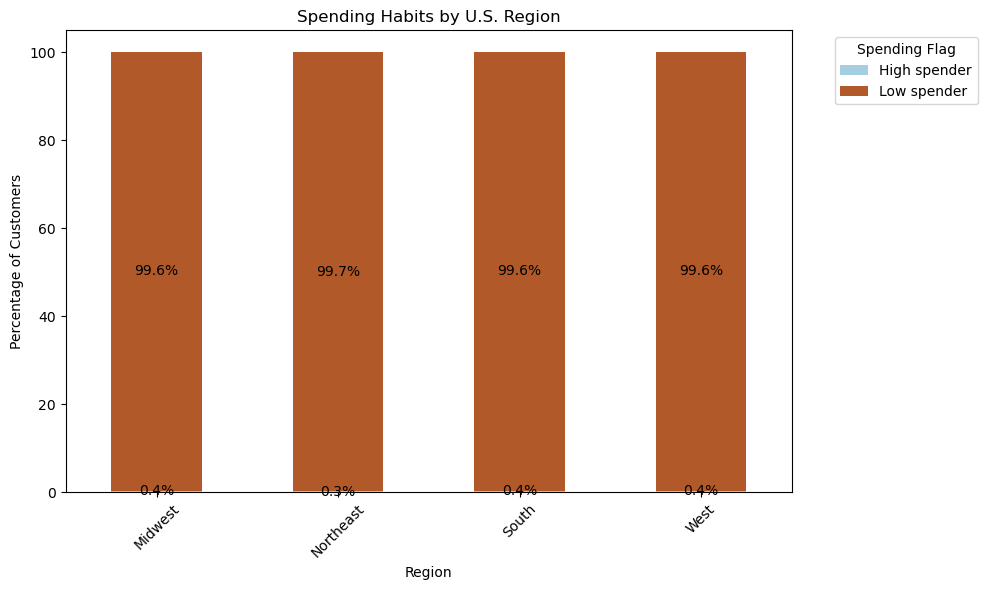

In [17]:
# Crosstab with row-wise percentages
spending_by_region = pd.crosstab(region_spending_flag_pd["region"], region_spending_flag_pd["spending_flag"], normalize="index") * 100

# Plot stacked bar chart
ax = spending_by_region.plot(kind="bar", stacked=True, figsize=(10,6), colormap="Paired")

plt.ylabel("Percentage of Customers")
plt.xlabel("Region")
plt.title("Spending Habits by U.S. Region")
plt.legend(title="Spending Flag", bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage labels on each segment
for container in ax.containers:
    ax.bar_label(container, fmt="%.1f%%", label_type="center")

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [18]:
#Export spending_habits by region Stacked barchart
ax.figure.savefig(os.path.join('Analysis','Visualizations', 'spending_habits_by_region.png'))

convert the region and spending _flag column back to polars dataframe to have the same datatframe format as the other columns in the dataset.

In [19]:
region_spending_flag_pl = pl.from_pandas(region_spending_flag_pd)

# 4. The Instacart CFO isn’t interested in customers who don’t generate much revenue for the app. Create an exclusion flag for low-activity customers (customers with less than 5 orders) and exclude them from the data. Make sure you export this sample

In [20]:
#count the number of order per user
user_counts = (df_new.group_by("user_id").agg(pl.col("order_number").max().alias("user_max_order")))

user_max_order represents the largest order_number recorded for each user_id, which effectively equals the total number of orders that customer has placed

In [21]:
user_counts

user_id,user_max_order
i64,i64
17846,13
29118,54
199785,37
120991,13
82617,5
…,…
124516,11
81262,5
204346,12


In [22]:
#create an exclusion flag of customers with less than 5 orders
user_counts = user_counts.with_columns((pl.col("user_max_order") < 5).alias("exclusion_flag"))

In [23]:
user_counts

user_id,user_max_order,exclusion_flag
i64,i64,bool
17846,13,false
29118,54,false
199785,37,false
120991,13,false
82617,5,false
…,…,…
124516,11,false
81262,5,false
204346,12,false


In [24]:
#join the exclusion_flag column to the data set
df_flagged = df_new.join(user_counts.select(["user_id", "exclusion_flag"]),on="user_id",how="left")

In [25]:
#filter out low activity customers (customers with less than 5 orders
(df_flagged.lazy().filter(~pl.col("exclusion_flag")).sink_parquet("data/prepared/df_high_activity.parquet",engine="streaming",compression="zstd"))

In [26]:
#import dataframe to inspect 
df_high_activity = pl.read_parquet("data/prepared/df_high_activity.parquet")

In [27]:
df_high_activity.shape

(30964564, 35)

In [28]:
df_high_activity.head()

product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Avg_spending,spending_flag,user_ord_behaviour,order_frequecy_flag,order_frequency_flag,user_ord_median,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,exclusion_flag
i64,str,i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,i64,str,str,str,str,i64,str,f64,str,f64,str,str,f64,str,str,str,i64,str,i64,str,i64,str,bool
1,"""Chocolate Sandwich Cookies""",61,19,5.8,3139998,138,28,6,11,3.0,5,0,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",32,"""Regular customer""",6.935811,"""Low spender""",8.0,null,"""Frequent customer""",8.0,"""Frequent customer""","""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620,"""Midwest""",false
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1977647,138,30,6,17,20.0,1,1,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",32,"""Regular customer""",6.935811,"""Low spender""",8.0,null,"""Frequent customer""",8.0,"""Frequent customer""","""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620,"""Midwest""",false
1,"""Chocolate Sandwich Cookies""",61,19,5.8,389851,709,2,0,21,6.0,20,0,"""Mid-range-product""","""Busiest day""","""Busiest days""","""Average orders""",5,"""New customer""",7.930208,"""Low spender""",8.0,null,"""Frequent customer""",8.0,"""Frequent customer""","""Female""","""Vermont""",66,"""6/16/2018""",2,"""married""",158302,"""Northeast""",false
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1701441,777,16,1,7,26.0,7,0,"""Mid-range-product""","""Regularly busy""","""Busiest days""","""Average orders""",26,"""Regular customer""",6.935398,"""Low spender""",11.0,"""Regular customer""",null,11.0,"""Regular customer""","""Female""","""Hawaii""",51,"""1/4/2019""",2,"""married""",57797,"""West""",false
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1871483,825,3,2,14,30.0,2,0,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",9,"""New customer""",5.957576,"""Low spender""",20.0,"""Regular customer""",null,20.0,"""Regular customer""","""Male""","""District of Columbia""",20,"""5/8/2019""",3,"""living with parents and siblin…",34171,"""South""",false


# 5. The marketing and business strategy units at Instacart want to create more-relevant marketing strategies for different products and are, thus, curious about customer profiling in their database. Create a profiling variable based on age, income, certain goods in the “department_id” column, and number of dependents. You might also use the “orders_day_of_week” and “order_hour_of_day” columns if you can think of a way they would impact customer profiles. (Hint: As an example, try thinking of what characteristics would lead you to the profile “Single adult” or “Young parent.”)

In [29]:
#creating profiles
df_profiles = df_high_activity.with_columns(
    pl.when(
        (pl.col("age") < 30) &
        (pl.col("number_of_dependants") == 0) &
        (pl.col("income") < 50000)
    ).then(pl.lit("Young single")) #young single profile:are people without dependants and are 30years below and earn less than 50000
    .when(
        (pl.col("age") < 35) &
        (pl.col("number_of_dependants") > 0) &
        (pl.col("income") < 80000)
    ).then(pl.lit("Young parent")) #young parent profile are people with dependents,35 years below and earn less than 80000
    .when(
        (pl.col("number_of_dependants") >= 0) &
        (pl.col("income") >= 100000)
    ).then(pl.lit("Rich family"))  #rich family profile are people with or without dependants and earn from 1000000 and over
    .when(
        (pl.col("number_of_dependants") >= 0) &
        (pl.col("income") <= 700000)
    ).then(pl.lit("Average family")) #average family profile are people with/without dependants and earn 700000 below
    .when(pl.col("age") >= 65).then(pl.lit("Retired")) #retired/old adult profile are old people of 65 and over 
    .when(pl.col("order_hour_of_day") >= 20).then(pl.lit("Night shopper")) #night shoppers profile are for people that shops from 8pm till midnight 
    .when(pl.col("orders_day_of_week").is_in([1,2,3,4])).then(pl.lit("Weekday shoppers")) #weekday shopper profile are for people that shops during the week 
    .when(pl.col("orders_day_of_week").is_in([0,5,6])).then(pl.lit("Weekend shopper")) #weekend shopper profile are for people that do majority of their shopping during the weekend 
    .otherwise(pl.lit("others"))
    .alias("customer_profile")
)


In [30]:
df_profiles.group_by("customer_profile").count()

/tmp/ipykernel_1586872/1836898058.py:1: DeprecationWarning: `GroupBy.count` was renamed; use `GroupBy.len` instead
  df_profiles.group_by("customer_profile").count()


customer_profile,count
str,u32
"""Rich family""",14207402
"""Young parent""",4232902
"""Young single""",237953
"""Average family""",12286307


# 6. Create an appropriate visualization to show the distribution of profiles

In [31]:
# Data from customer profiles
customer_profile = ["Young single", "Rich family", "Young parent", "Average family"]
counts = [237953, 14207402, 4232902, 12286307]

In [32]:
# Calculate percentages
total = sum(counts)
percentages = [(c/total)*100 for c in counts]

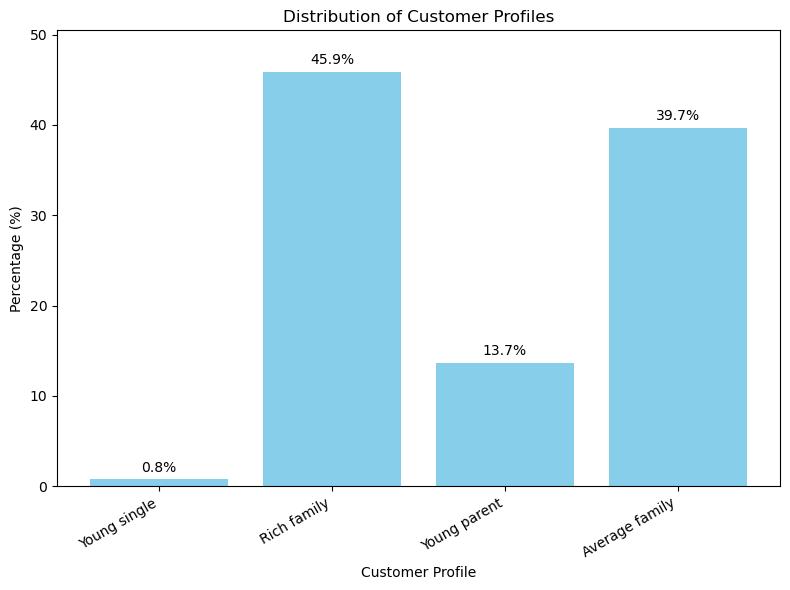

In [33]:
# Create the bar chart
fig, ax = plt.subplots(figsize=(8,6))
bars = ax.bar(customer_profile, percentages, color="skyblue")

# Labels and title
ax.set_ylabel("Percentage (%)")
ax.set_xlabel("Customer Profile")
ax.set_title("Distribution of Customer Profiles")
ax.set_ylim(0, max(percentages)*1.1)
ax.set_xticks(range(len(customer_profile)))
ax.set_xticklabels(customer_profile, rotation=30, ha="right")

# Add percentage labels above bars
for bar, pct in zip(bars, percentages):
    ax.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.5,
            f"{pct:.1f}%", ha="center", va="bottom")

plt.tight_layout()
plt.show()


In [34]:
#Export distribution of customer profiles barchart
bar.figure.savefig(os.path.join('Analysis','Visualizations', 'Distribution_of_customer_profiles.png'))

# 7. Aggregate the max, mean, and min variables on a customer-profile level for usage frequency and expenditure

In [35]:
#creating customer profilr aggregate with maximum order and Average spending
customer_profile_agg = (
    df_profiles
    .group_by("customer_profile")
    .agg([
        pl.col("max_order").mean().alias("freq_mean"),
        pl.col("max_order").min().alias("freq_min"),
        pl.col("max_order").max().alias("freq_max"),

        pl.col("Avg_spending").mean().alias("spend_mean"),
        pl.col("Avg_spending").min().alias("spend_min"),
        pl.col("Avg_spending").max().alias("spend_max")
    ])
    .sort("customer_profile") 
)

In [36]:
customer_profile_agg

customer_profile,freq_mean,freq_min,freq_max,spend_mean,spend_min,spend_max
str,f64,i64,i64,f64,f64,f64
"""Average family""",34.268124,5,99,7.645396,1.0,18.233333
"""Rich family""",34.579927,5,99,7.951706,4.210556,20.114286
"""Young parent""",34.404502,5,99,7.715663,1.628571,14.423077
"""Young single""",33.728955,5,99,6.894898,2.1,13.878571


# 8. Compare your customer profiles with regions and departments. Can you identify a link between them? Customers may demonstrate different behaviors across regions, which could make this information important.

In [37]:
#create customer_profiile with region counts to know how many customer of each customer profile comes from each region.
cust_profile_region_counts = (
    df_profiles
    .select(["customer_profile", "region"]) #selcting only needed columns
    .lazy()
    .group_by(["customer_profile", "region"])
    .agg(pl.len().alias("count"))
    .collect(streaming=True)
)

/tmp/ipykernel_1586872/4253649584.py:8: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  .collect(streaming=True)


In [38]:
cust_profile_region_counts

customer_profile,region,count
str,str,u32
"""Average family""","""West""",3138440
"""Rich family""","""South""",4663945
"""Young parent""","""Northeast""",720990
"""Young single""","""Midwest""",54815
"""Young parent""","""South""",1413373
…,…,…
"""Rich family""","""Midwest""",3400093
"""Young single""","""West""",63682
"""Average family""","""Midwest""",2806291


I will load the departments_wrangled dataset from Task 4.4, which contains the department names, and merge it with the df_profiles dataset. This will allow me to interpret the department_id values and use them to create a customer profile with department counts. 

In [39]:
print(os.getcwd())

/home/wole/code


In [40]:
#build a path
base_dir = os.getcwd()

In [41]:
csv_path = os.path.join(base_dir, "data", "prepared", "departments_wrangled.csv")

In [42]:
#import the department wrangled dataset 
dept_lookup = pl.read_csv(csv_path)

In [43]:
#check output
dept_lookup.head()

department_id,department
i64,str
1,"""frozen"""
2,"""other"""
3,"""bakery"""
4,"""produce"""
5,"""alcohol"""


In [44]:
#rename the department to department_name
dept_lookup = dept_lookup.rename({"department": "department_name"})

In [45]:
dept_lookup

department_id,department_name
i64,str
1,"""frozen"""
2,"""other"""
3,"""bakery"""
4,"""produce"""
5,"""alcohol"""
…,…
17,"""household"""
18,"""babies"""
19,"""snacks"""


In [46]:
# Build a mapping dictionary
dept_map = dict(zip(
    dept_lookup["department_id"].to_list(),
    dept_lookup["department_name"].to_list()
))


In [47]:
# Add the name column by mapping
df_profiles_named = df_profiles.with_columns(
    pl.col("department_id")
      .map_elements(lambda x: dept_map.get(x, None), return_dtype=pl.Utf8)
      .alias("department_name")
)

In [48]:
df_profiles_named.head()

product_id,product_name,aisle_id,department_id,prices,order_id,user_id,order_number,orders_day_of_week,order_hour_of_day,days_since_prior_order,add_to_cart_order,reordered,price_range_loc,busiest_day,busiest_days,busiest_period_of_day,max_order,loyalty_flag,Avg_spending,spending_flag,user_ord_behaviour,order_frequecy_flag,order_frequency_flag,user_ord_median,frequency_flag,gender,state,age,date_joined,number_of_dependants,marital_status,income,region,exclusion_flag,customer_profile,department_name
i64,str,i64,i64,f64,i64,i64,i64,i64,i64,f64,i64,i64,str,str,str,str,i64,str,f64,str,f64,str,str,f64,str,str,str,i64,str,i64,str,i64,str,bool,str,str
1,"""Chocolate Sandwich Cookies""",61,19,5.8,3139998,138,28,6,11,3.0,5,0,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",32,"""Regular customer""",6.935811,"""Low spender""",8.0,null,"""Frequent customer""",8.0,"""Frequent customer""","""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620,"""Midwest""",false,"""Average family""","""snacks"""
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1977647,138,30,6,17,20.0,1,1,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",32,"""Regular customer""",6.935811,"""Low spender""",8.0,null,"""Frequent customer""",8.0,"""Frequent customer""","""Male""","""Minnesota""",81,"""8/1/2019""",1,"""married""",49620,"""Midwest""",false,"""Average family""","""snacks"""
1,"""Chocolate Sandwich Cookies""",61,19,5.8,389851,709,2,0,21,6.0,20,0,"""Mid-range-product""","""Busiest day""","""Busiest days""","""Average orders""",5,"""New customer""",7.930208,"""Low spender""",8.0,null,"""Frequent customer""",8.0,"""Frequent customer""","""Female""","""Vermont""",66,"""6/16/2018""",2,"""married""",158302,"""Northeast""",false,"""Rich family""","""snacks"""
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1701441,777,16,1,7,26.0,7,0,"""Mid-range-product""","""Regularly busy""","""Busiest days""","""Average orders""",26,"""Regular customer""",6.935398,"""Low spender""",11.0,"""Regular customer""",null,11.0,"""Regular customer""","""Female""","""Hawaii""",51,"""1/4/2019""",2,"""married""",57797,"""West""",false,"""Average family""","""snacks"""
1,"""Chocolate Sandwich Cookies""",61,19,5.8,1871483,825,3,2,14,30.0,2,0,"""Mid-range-product""","""Regularly busy""","""Regular days""","""Most orders""",9,"""New customer""",5.957576,"""Low spender""",20.0,"""Regular customer""",null,20.0,"""Regular customer""","""Male""","""District of Columbia""",20,"""5/8/2019""",3,"""living with parents and siblin…",34171,"""South""",false,"""Young parent""","""snacks"""


In [49]:
#Export the new dataframe without PII 
df_profiles_named.lazy().sink_parquet("data/prepared/df_final_dataset.parquet",compression="zstd",statistics=False)

In [50]:
# Finding which departments have the highest frequency of orders
dept_freq = (df_profiles_named.group_by("department_name").agg(pl.count().alias("frequency")).sort("frequency", descending=True))

/tmp/ipykernel_1586872/1823773173.py:2: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  dept_freq = (df_profiles_named.group_by("department_name").agg(pl.count().alias("frequency")).sort("frequency", descending=True))


In [51]:
#check output 
dept_freq

department_name,frequency
str,u32
"""produce""",9079273
"""dairy eggs""",5177182
"""snacks""",2766406
"""beverages""",2571901
"""frozen""",2121731
…,…
"""alcohol""",144627
"""pets""",93060
"""missing""",64768


In [52]:
#convert dept_freq into pandas to plot chart
dept_freq_pd = dept_freq.to_pandas()

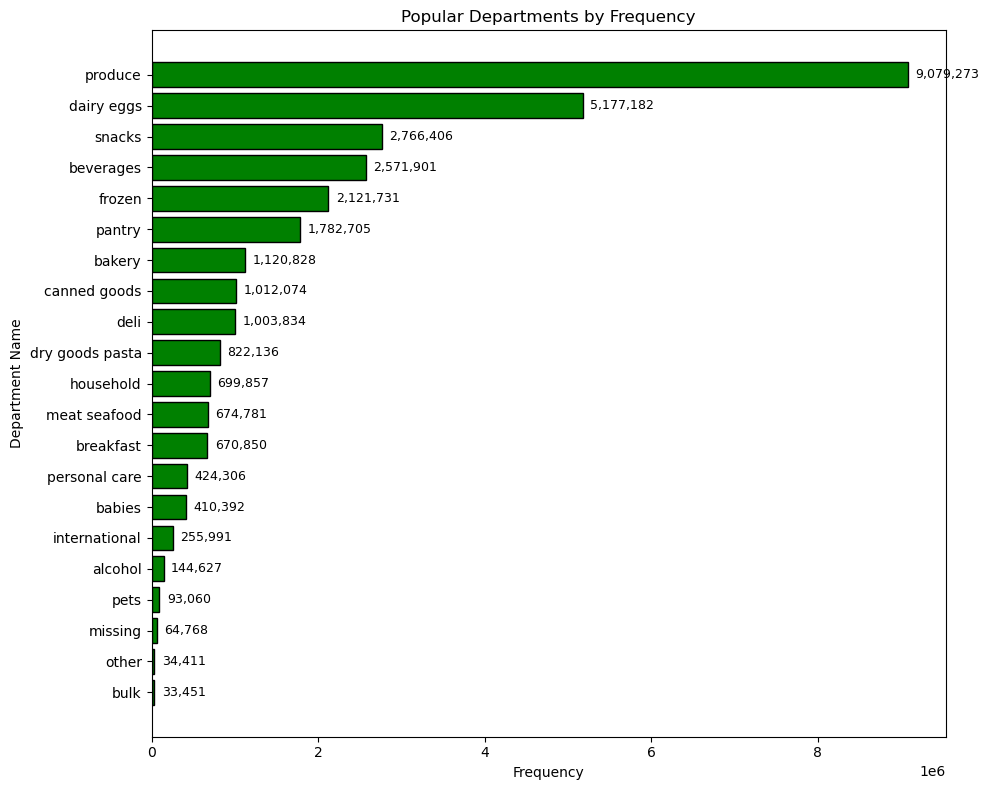

In [53]:
#plot department frequency chart
dept_freq_pd = dept_freq_pd.sort_values("frequency", ascending=True)  

plt.figure(figsize=(10, 8))

bars = plt.barh(
    dept_freq_pd["department_name"],
    dept_freq_pd["frequency"],
    color='green',
    edgecolor='black'
)

plt.title("Popular Departments by Frequency")
plt.xlabel("Frequency")
plt.ylabel("Department Name")

# Add count labels outside the bars
for bar in bars:
    xval = bar.get_width()
    plt.text(
        xval + (0.01 * max(dept_freq_pd["frequency"])), 
        bar.get_y() + bar.get_height()/2,
        f'{int(xval):,}', 
        ha='left', va='center', fontsize=9
    )

plt.tight_layout()
plt.show()

Produce,dairy eggs, snacks,beverages and frozen are the most popular departments

In [54]:
#Export popular department by frequency barchart
bar.figure.savefig(os.path.join('Analysis','Visualizations', 'Popular_departments.png'))

In [55]:
# Select only the desired columns
df_selected = df_profiles_named.select([
    "product_name",
    "department_name"
])

In [56]:
df_selected

product_name,department_name
str,str
"""Chocolate Sandwich Cookies""","""snacks"""
"""Chocolate Sandwich Cookies""","""snacks"""
"""Chocolate Sandwich Cookies""","""snacks"""
"""Chocolate Sandwich Cookies""","""snacks"""
"""Chocolate Sandwich Cookies""","""snacks"""
…,…
"""Fresh Foaming Cleanser""","""personal care"""
"""Fresh Foaming Cleanser""","""personal care"""
"""Fresh Foaming Cleanser""","""personal care"""


In [57]:
#group the items into departments
df_produce_count_lazy = df_selected.lazy().filter(
    pl.col("department_name") == "produce"
).group_by("product_name").agg(
    pl.count().alias("order_count")
).sort("order_count", descending=True)

# Collect only the result
df_produce_count_result = df_produce_count_lazy.collect()
print(df_produce_count_result)

/tmp/ipykernel_1586872/3168914414.py:5: DeprecationWarning: `pl.count()` is deprecated. Please use `pl.len()` instead.
(Deprecated in version 0.20.5)
  pl.count().alias("order_count")


shape: (1_684, 2)
┌─────────────────────────────────┬─────────────┐
│ product_name                    ┆ order_count │
│ ---                             ┆ ---         │
│ str                             ┆ u32         │
╞═════════════════════════════════╪═════════════╡
│ Banana                          ┆ 453164      │
│ Bag of Organic Bananas          ┆ 366403      │
│ Organic Strawberries            ┆ 255988      │
│ Organic Baby Spinach            ┆ 231772      │
│ Organic Hass Avocado            ┆ 206799      │
│ …                               ┆ …           │
│ Kumkuats                        ┆ 2           │
│ Organic Honey Bunch Grape Toma… ┆ 2           │
│ Baby Beets                      ┆ 2           │
│ Red Banana                      ┆ 2           │
│ Graffiti Eggplant               ┆ 2           │
└─────────────────────────────────┴─────────────┘


In [58]:
#convert df_produce count_result to pandas
df_produce_count_pd = df_produce_count_result.to_pandas()

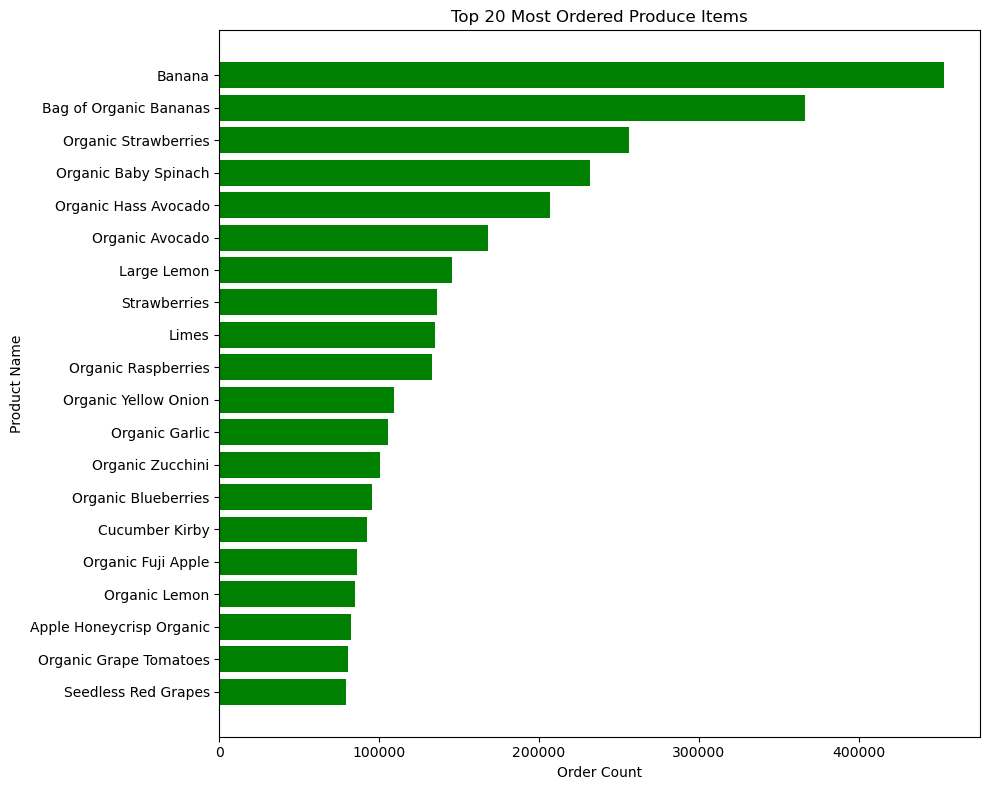

In [59]:
top_20_pd = df_produce_count_pd.head(20)

#Ensure the folder exists
folder_path = os.path.join('Analysis', 'Visualizations')
os.makedirs(folder_path, exist_ok=True)

#Plot horizontal bar chart
plt.figure(figsize=(10,8))
plt.barh(top_20_pd["product_name"], top_20_pd["order_count"], color='green')
plt.xlabel("Order Count")
plt.ylabel("Product Name")
plt.title("Top 20 Most Ordered Produce Items")
plt.gca().invert_yaxis()  # largest bar on top
plt.tight_layout()

#Save the chart
save_path = os.path.join(folder_path, "Most_Ordered_Produce_Items.png")
plt.savefig(save_path, dpi=300)

#Show the chart
plt.show()

The chart above shows the top 20 most ordered produce items which banana leads the chart. 

## Ordering habits based on customer loyalty_flag

In [60]:
#select needed colunms 
df_loyalty = df_profiles_named.select([
    "loyalty_flag",
    "order_number"
])

In [61]:
mean_order_loyalty = (
    df_loyalty.lazy()
    .group_by("loyalty_flag")
    .agg(
        pl.mean("order_number").alias("avg_orders_per_customer")
    )
    .sort("avg_orders_per_customer", descending=True)
    .collect()
)

In [62]:
#check output
mean_order_loyalty

loyalty_flag,avg_orders_per_customer
str,f64
"""Loyal customer""",32.641196
"""Regular customer""",12.347452
"""New customer""",4.268295


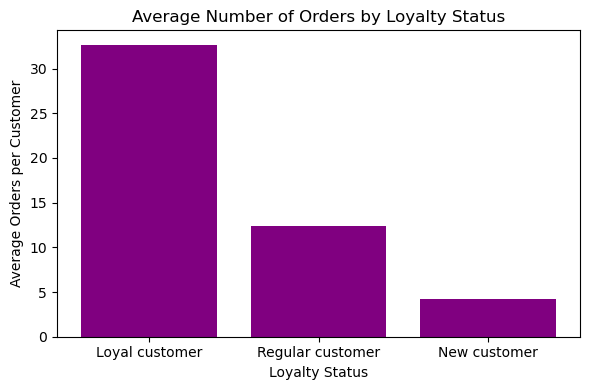

In [63]:
#plot chart
df_loyalty_pd = mean_order_loyalty.to_pandas()

# Ensure folder exists
os.makedirs(os.path.join('Analysis', 'Visualizations'), exist_ok=True)

# Plot bar chart
plt.figure(figsize=(6,4))
plt.bar(df_loyalty_pd["loyalty_flag"], df_loyalty_pd["avg_orders_per_customer"], color="purple")
plt.xlabel("Loyalty Status")
plt.ylabel("Average Orders per Customer")
plt.title("Average Number of Orders by Loyalty Status")
plt.tight_layout()

# Save chart
save_path = os.path.join("Analysis", "Visualizations", "Average_Orders_by_Loyalty_Status.png")
plt.savefig(save_path, dpi=300)

# Show chart
plt.show()

In [64]:
#create customer_profiile with department_name counts to know how many customer of each customer profile shops in the department.
cust_profile_dept_counts = (
    df_profiles_named
    .select(["customer_profile", "department_name"]) #selcting only needed columns
    .lazy()
    .group_by(["customer_profile", "department_name"])
    .agg(pl.len().alias("count"))
    .collect(streaming=True)
)

/tmp/ipykernel_1586872/333317407.py:8: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  .collect(streaming=True)


In [65]:
cust_profile_dept_counts

customer_profile,department_name,count
str,str,u32
"""Rich family""","""pantry""",839964
"""Average family""","""beverages""",1066127
"""Young single""","""beverages""",25166
"""Average family""","""household""",280102
"""Young single""","""household""",6335
…,…,…
"""Rich family""","""canned goods""",485253
"""Young single""","""produce""",58110
"""Young parent""","""bakery""",150113


In [66]:
#recall customer profile by region count dataset to plot chart
cust_profile_region_counts

customer_profile,region,count
str,str,u32
"""Average family""","""West""",3138440
"""Rich family""","""South""",4663945
"""Young parent""","""Northeast""",720990
"""Young single""","""Midwest""",54815
"""Young parent""","""South""",1413373
…,…,…
"""Rich family""","""Midwest""",3400093
"""Young single""","""West""",63682
"""Average family""","""Midwest""",2806291


In [67]:
#convert customer profile by region into pandas dataframe
cust_profile_region_counts_pd = cust_profile_region_counts.to_pandas()

In [68]:
cust_profile_region_counts_pd

,customer_profile,region,count
0,Average family,West,3138440
1,Rich family,South,4663945
2,Young parent,Northeast,720990
3,Young single,Midwest,54815
4,Young parent,South,1413373
5,Young single,South,73447
6,Young single,Northeast,46009
7,Rich family,Northeast,2516484
8,Young parent,West,1098225
9,Young parent,Midwest,1000314


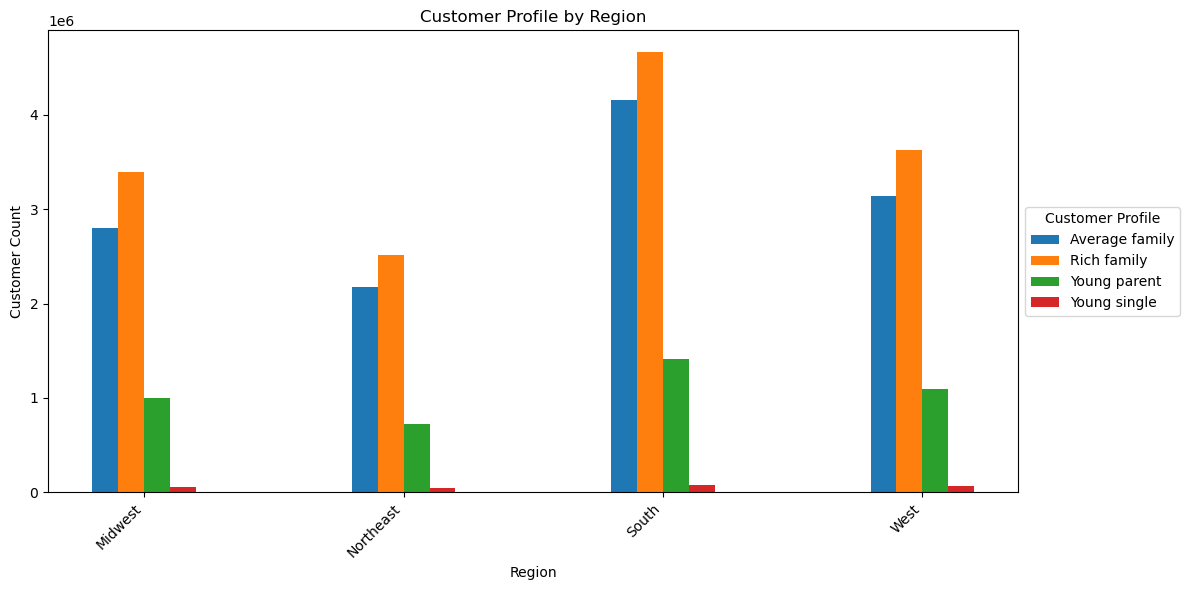

In [88]:
#create group bar chart
pivot_df = pd.crosstab(
    index=cust_profile_region_counts_pd["region"],
    columns=cust_profile_region_counts_pd["customer_profile"],
    values=cust_profile_region_counts_pd["count"],
    aggfunc="sum"
).fillna(0)

#Plot grouped bar chart
customer_profiles = pivot_df.columns
regions = pivot_df.index
x = np.arange(len(regions))  # label locations
width = 0.1  # width of each bar

fig, ax = plt.subplots(figsize=(12, 6))

# Plot each customer profile as a separate bar
for i, profile in enumerate(customer_profiles):
    ax.bar(x + i*width, pivot_df[profile], width, label=profile)

# Labels and title
ax.set_xlabel('Region')
ax.set_ylabel('Customer Count')
ax.set_title('Customer Profile by Region')
ax.set_xticks(x + width*(len(customer_profiles)-1)/2)
ax.set_xticklabels(regions, rotation=45, ha='right')
ax.legend(title='Customer Profile')
ax.legend(title='Customer Profile', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
os.makedirs(os.path.join('Analysis', 'Visualizations'), exist_ok=True)
save_path = os.path.join('Analysis', 'Visualizations', 'customer_profile_by_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

In [71]:
#convert customer profile by department count into pandas
cust_profile_dept_counts_pd=cust_profile_dept_counts.to_pandas()

In [72]:
cust_profile_dept_counts_pd

,customer_profile,department_name,count
0,Rich family,pantry,839964
1,Average family,beverages,1066127
2,Young single,beverages,25166
3,Average family,household,280102
4,Young single,household,6335
...,...,...,...
79,Rich family,canned goods,485253
80,Young single,produce,58110
81,Young parent,bakery,150113
82,Young parent,other,4637


In [73]:
cust_profile_dept_counts_pd.value_counts()

customer_profile  department_name  count  
Average family    alcohol          55137      1
                  babies           157047     1
                  bakery           435165     1
                  beverages        1066127    1
                  breakfast        272481     1
                                             ..
Young single      pantry           12088      1
                  personal care    3679       1
                  pets             733        1
                  produce          58110      1
                  snacks           36226      1
Name: count, Length: 84, dtype: int64

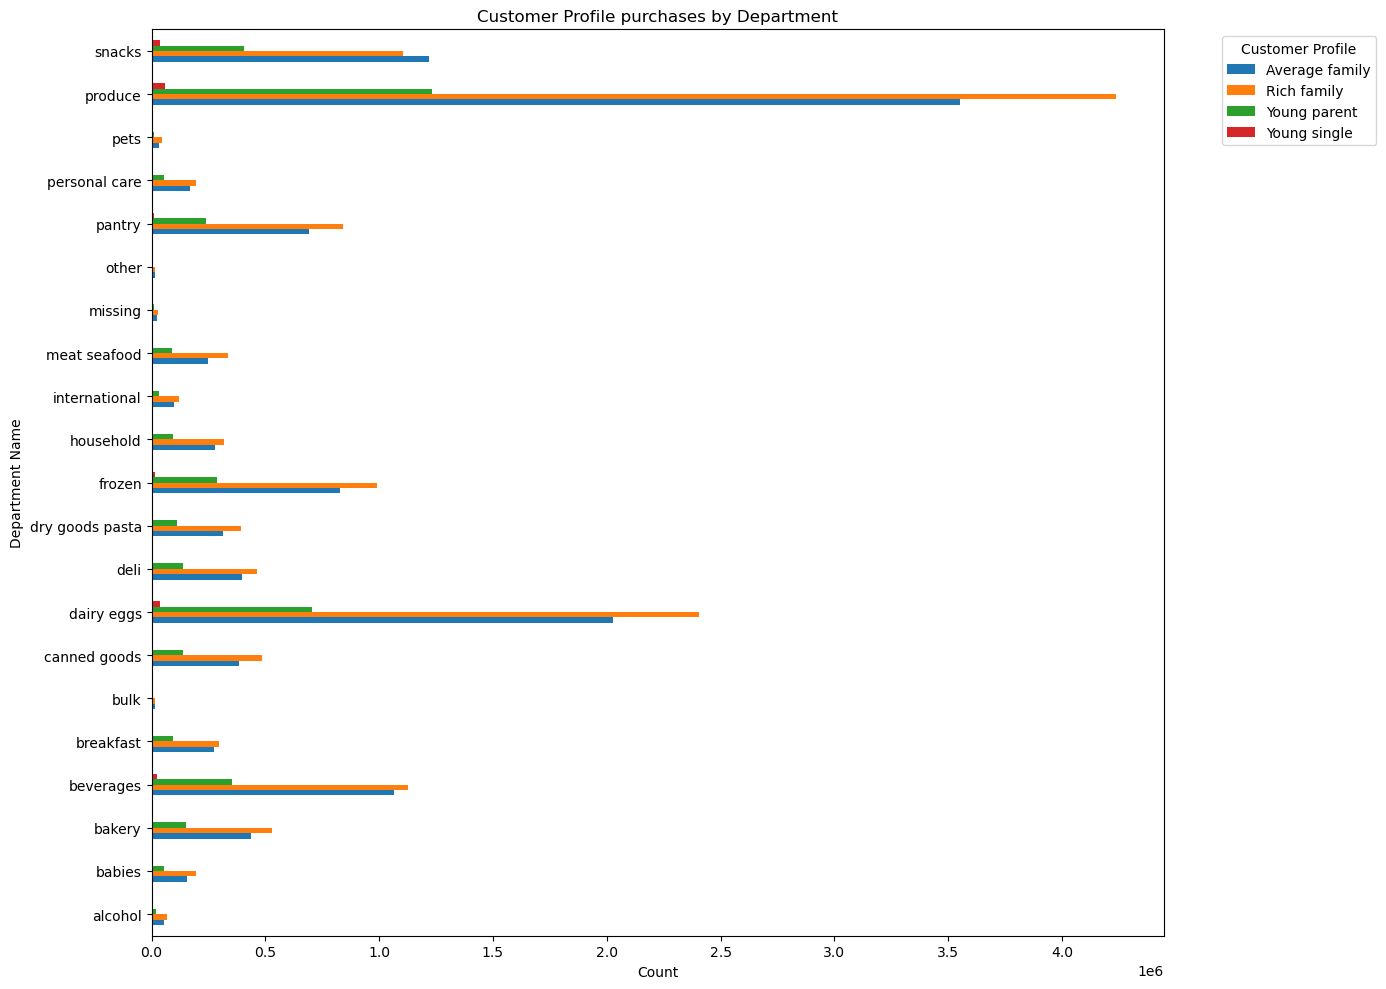

In [89]:
pivot_df = pd.crosstab(
    cust_profile_dept_counts_pd['customer_profile'], 
    cust_profile_dept_counts_pd['department_name'], 
    values=cust_profile_dept_counts_pd['count'], 
    aggfunc='sum'
).fillna(0)
#Grouped Bar Chart (large number of departments, use horizontal bars for readability)
pivot_df.T.plot(kind='barh', figsize=(14,10))
plt.title('Customer Profile purchases by Department')
plt.xlabel('Count')
plt.ylabel('Department Name')
plt.legend(title='Customer Profile', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
os.makedirs(os.path.join('Analysis', 'Visualizations'), exist_ok=True)
save_path = os.path.join('Analysis', 'Visualizations', 'customer_profile_purchases_by_dept.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()

## Identify a link betweeen the two charts
Rich families and Average families are the most common profiles across all regions with a higher dominance in the South and Midwest.
They also account for the highest purchase counts in departments like produce, dairy eggs, and beverages.

## ordering habits based on a customer’s region?

In [76]:
#create department and region counts to know popular order count across the region.
dept_region_count = (
    df_profiles_named
    .select(["region", "department_name"]) #selcting only needed columns
    .lazy()
    .group_by(["region", "department_name"])
    .agg(pl.len().alias("count"))
    .collect(streaming=True)
)

/tmp/ipykernel_1586872/2077799095.py:8: DeprecationWarning: the `streaming` parameter was deprecated in 1.25.0; use `engine` instead.
  .collect(streaming=True)


In [77]:
dept_region_count

region,department_name,count
str,str,u32
"""Northeast""","""frozen""",370436
"""Northeast""","""canned goods""",176936
"""Midwest""","""canned goods""",237459
"""Midwest""","""dry goods pasta""",193463
"""South""","""deli""",333620
…,…,…
"""Midwest""","""pets""",21358
"""Northeast""","""pets""",17734
"""West""","""breakfast""",173619


In [78]:
#convert department_region count into pandas
dept_region_counts_pd= dept_region_count.to_pandas()

In [79]:
dept_region_counts_pd

,region,department_name,count
0,Northeast,frozen,370436
1,Northeast,canned goods,176936
2,Midwest,canned goods,237459
3,Midwest,dry goods pasta,193463
4,South,deli,333620
...,...,...,...
79,Midwest,pets,21358
80,Northeast,pets,17734
81,West,breakfast,173619
82,South,missing,21787


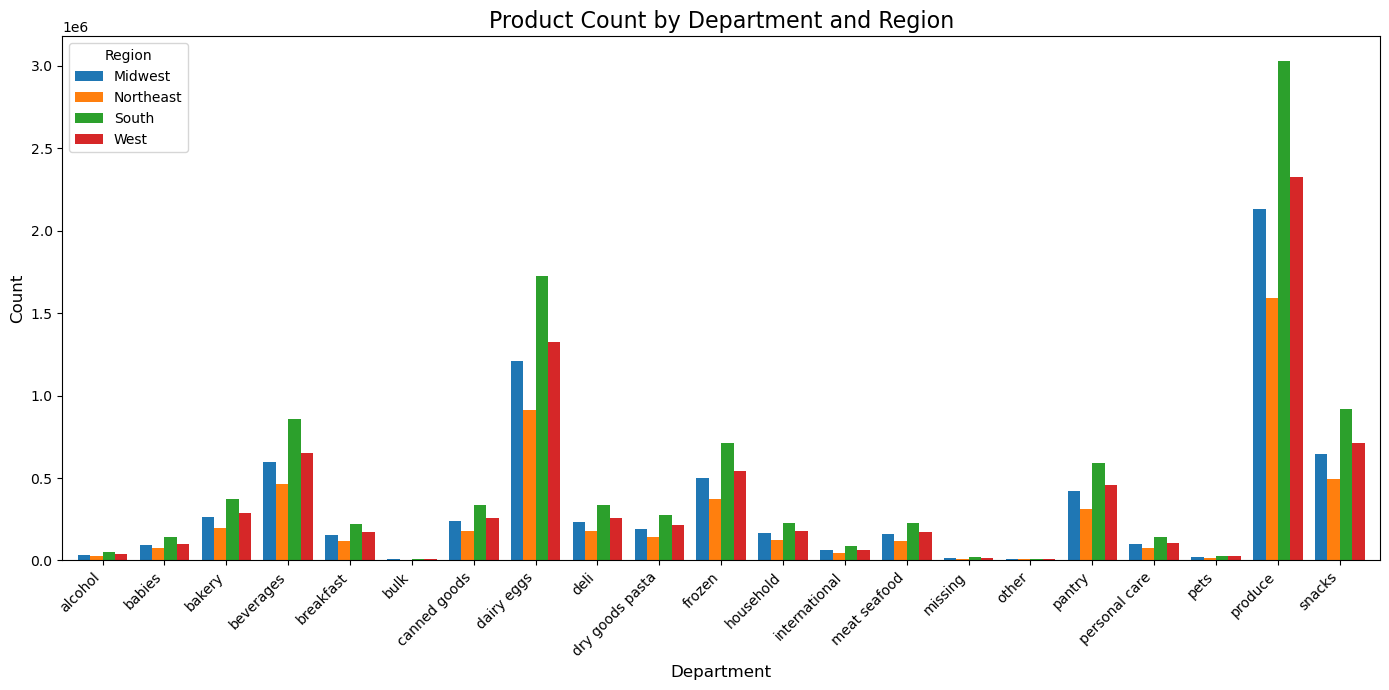

In [86]:
#create chart
pivot_df = pd.crosstab(
    index=dept_region_counts_pd['department_name'], 
    columns=dept_region_counts_pd['region'], 
    values=dept_region_counts_pd['count'], 
    aggfunc='sum'
).fillna(0)

# Plot grouped bar chart
ax = pivot_df.plot(kind='bar', figsize=(14, 7), width=0.8)

plt.title("Product Count by Department and Region", fontsize=16)
plt.xlabel("Department", fontsize=12)
plt.ylabel("Count", fontsize=12)
plt.xticks(rotation=45, ha='right')
plt.legend(title='Region')
plt.tight_layout()

#Save chart
os.makedirs(os.path.join('Analysis', 'Visualizations'), exist_ok=True)
save_path = os.path.join('Analysis', 'Visualizations', 'product_count_by_dept_and_region.png')
plt.savefig(save_path, dpi=300, bbox_inches='tight')
plt.show()